<a href="https://colab.research.google.com/github/Subho-Halder/Bank-Marketing-Campaign--Predicting-Term-Deposit-/blob/main/Bank_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Campaign- Predicting Term Deposit (Classification)

In [ ]:
import pandas as pd    
import seaborn as sns     
import numpy as np        
import matplotlib.pyplot as plt     
from scipy import stats   

In [ ]:
df=pd.read_csv('bank-additional-full.csv')

In [ ]:
df

,age,job,marital,education,car.loan,hou.loan,per.loan,contact,month,day_of_week,campaign,pdays,outcome,y
0,56,housemaid,married,basic.4y,yes,no,no,telephone,may,mon,1,999,hold,no
1,57,services,married,high.school,yes,no,no,telephone,may,mon,1,999,hold,no
2,37,services,married,high.school,yes,yes,no,telephone,may,mon,1,999,hold,no
3,40,admin.,married,basic.6y,yes,no,no,telephone,may,mon,1,999,hold,no
4,56,services,married,high.school,yes,no,yes,telephone,may,mon,1,999,hold,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,hold,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,hold,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,hold,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,hold,yes


In [ ]:
#shape of data
df.shape

(41188, 14)

In [ ]:
# checking null value present in the data set 
df.isnull().sum()

age            0
job            0
marital        0
education      0
car.loan       0
hou.loan       0
per.loan       0
contact        0
month          0
day_of_week    0
campaign       0
pdays          0
outcome        0
y              0
dtype: int64

In [ ]:
#no of unique variables present in each features
df.nunique()

age            78
job            12
marital         3
education       7
car.loan        2
hou.loan        2
per.loan        2
contact         2
month          10
day_of_week     5
campaign       42
pdays          27
outcome         3
y               2
dtype: int64

No null value present in the data set

In [ ]:
df.describe()

,age,campaign,pdays
count,41188.00000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454
std,10.42125,2.770014,186.910907
min,17.00000,1.000000,0.000000
25%,32.00000,1.000000,999.000000
50%,38.00000,2.000000,999.000000
75%,47.00000,3.000000,999.000000
max,98.00000,56.000000,999.000000


In [ ]:
# renaming 'y' as 'target'
df=df.rename(columns={'y':'target'})

In [ ]:
df.head()

,age,job,marital,education,car.loan,hou.loan,per.loan,contact,month,day_of_week,campaign,pdays,outcome,target
0,56,housemaid,married,basic.4y,yes,no,no,telephone,may,mon,1,999,hold,no
1,57,services,married,high.school,yes,no,no,telephone,may,mon,1,999,hold,no
2,37,services,married,high.school,yes,yes,no,telephone,may,mon,1,999,hold,no
3,40,admin.,married,basic.6y,yes,no,no,telephone,may,mon,1,999,hold,no
4,56,services,married,high.school,yes,no,yes,telephone,may,mon,1,999,hold,no


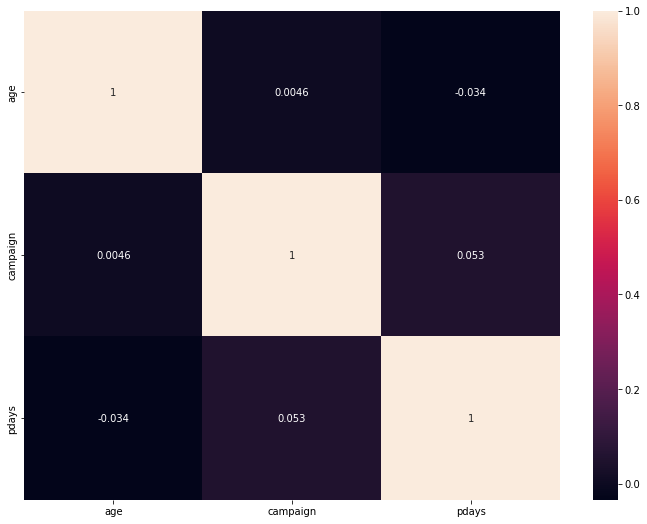

In [ ]:
#Checking correlation between features
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(),annot=True)

# Making Box Plot of numeric attributes to check outliers

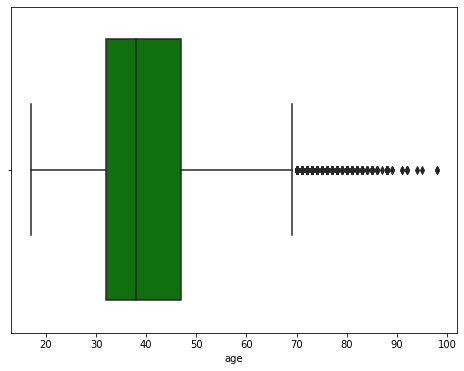

In [ ]:
#for 'age' feature
plt.figure(figsize=(8,6))
fig = sns.boxplot(x='age', data=df,color='green')

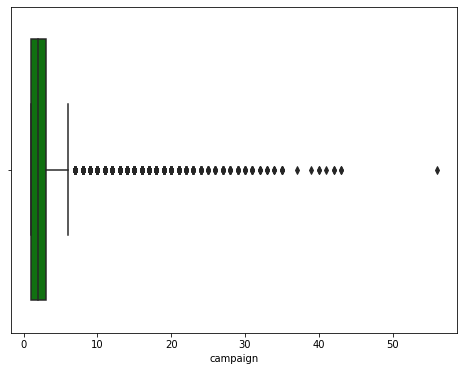

In [ ]:
plt.figure(figsize=(8,6))
fig = sns.boxplot(x='campaign', data=df,color='green')

Among all numeric variables 'Age' and 'campaign' features have outliers.

# Univariate Analysis

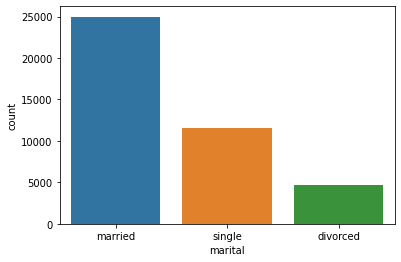

In [ ]:
# Visualizing Categorical Variables
plt.figure(figsize=(6,4))
sns.countplot(x='marital',data=df)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

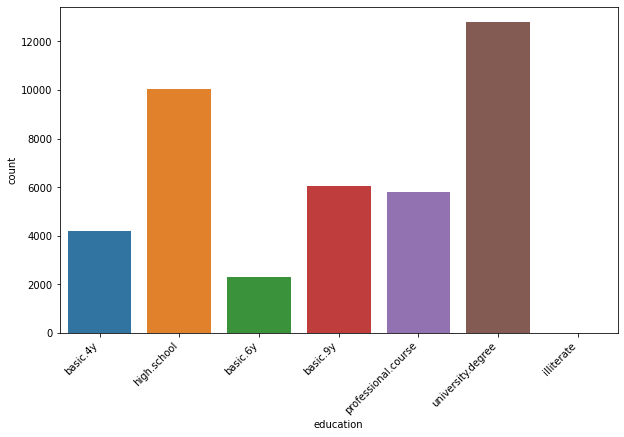

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',data=df)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

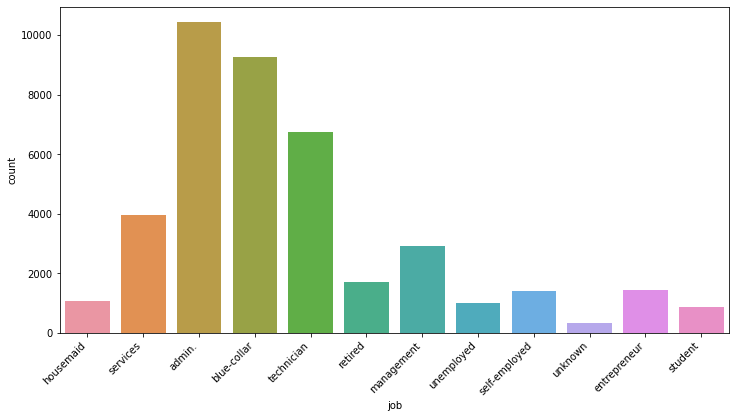

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="job",data=df)
plt.xticks(rotation=45, horizontalalignment='right')

Text(0.5, 0, 'Car loan')

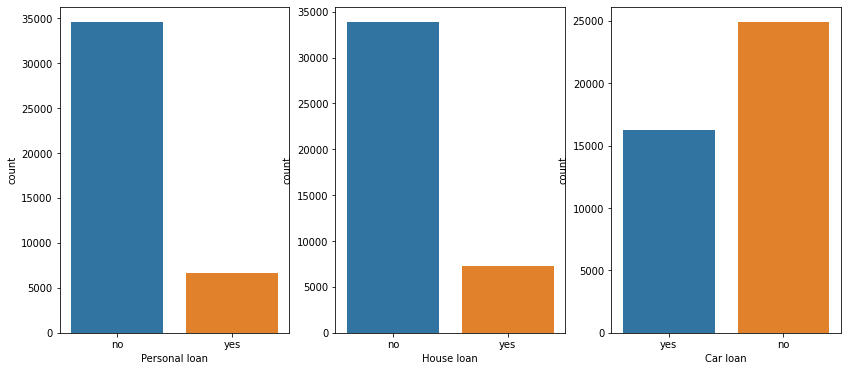

In [ ]:
#comparison between 3 kind of loans(House loan,Personal loan,car loan)
fig,(ax1,ax2,ax3) =plt.subplots(nrows = 1, ncols = 3,figsize=(14,6))
sns.countplot(x="per.loan",data=df,ax=ax1)
ax1.set_xlabel('Personal loan')
sns.countplot(x="hou.loan",data=df,ax=ax2)
ax2.set_xlabel('House loan')
sns.countplot(x="car.loan",data=df,ax=ax3)
ax3.set_xlabel('Car loan')

#Bivariate Analysis

In [ ]:
#converting target variable in 0 for no and 1 for yes
df['target']=df['target'].replace({'no':0,'yes':1})

In [ ]:
df.target.value_counts()

0    36548
1     4640
Name: target, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

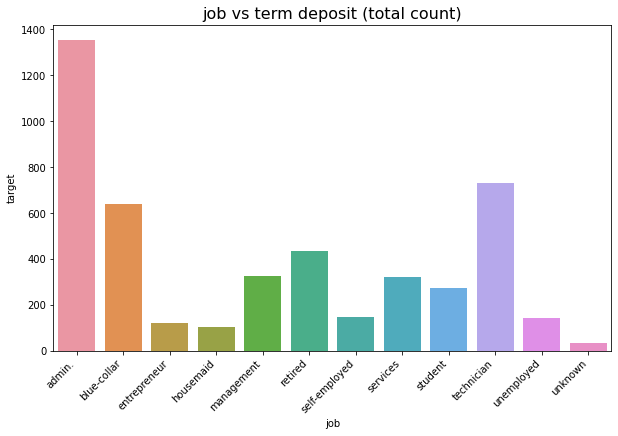

In [ ]:
df1 = df.groupby('job').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('job vs term deposit (total count)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

In [ ]:
df["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Text(0.5, 1.0, 'marital vs term deposit (total count)')

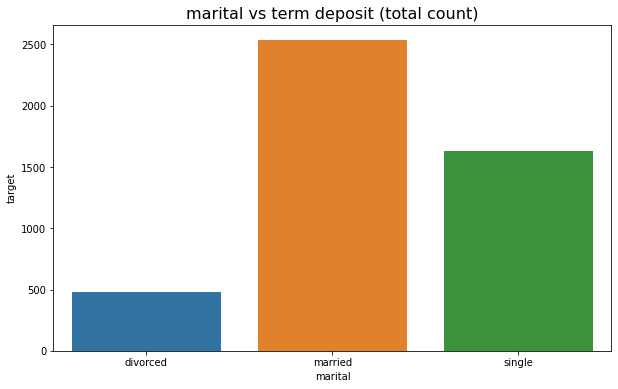

In [ ]:
df1 = df.groupby('marital').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('marital vs term deposit (total count)',fontsize=16)

In [ ]:
df["marital"].value_counts()

married     24977
single      11590
divorced     4621
Name: marital, dtype: int64

Text(0.5, 1.0, 'month vs term deposit (total)')

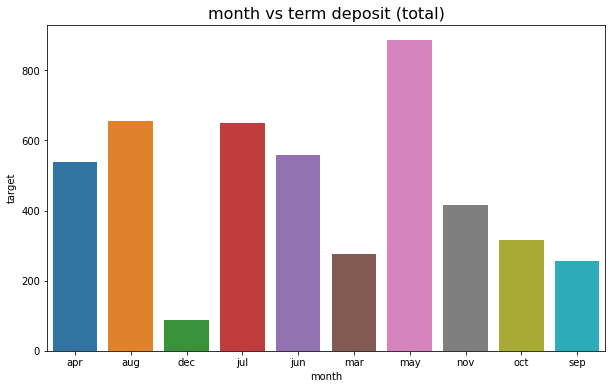

In [ ]:
df1 = df.groupby('month').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('month vs term deposit (total)',fontsize=16)

In [ ]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

Text(0.5, 1.0, 'day_of_week vs term deposit (total)')

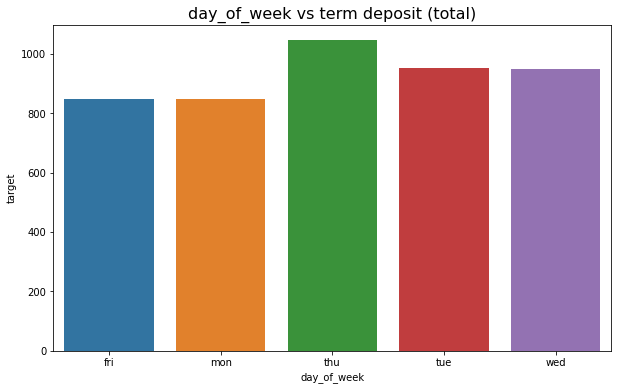

In [ ]:
df1 = df.groupby('day_of_week').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('day_of_week vs term deposit (total)',fontsize=16)

In [ ]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

# Data Preparation


In [ ]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [ ]:
# in pdays 
df['pdays_cat'] =['not_cont' if each==999 else 'cont' for each in df.pdays]

In [ ]:
df

,age,job,marital,education,car.loan,hou.loan,per.loan,contact,month,day_of_week,campaign,pdays,outcome,target,pdays_cat
0,56,housemaid,married,basic.4y,yes,no,no,telephone,may,mon,1,999,hold,0,not_cont
1,57,services,married,high.school,yes,no,no,telephone,may,mon,1,999,hold,0,not_cont
2,37,services,married,high.school,yes,yes,no,telephone,may,mon,1,999,hold,0,not_cont
3,40,admin.,married,basic.6y,yes,no,no,telephone,may,mon,1,999,hold,0,not_cont
4,56,services,married,high.school,yes,no,yes,telephone,may,mon,1,999,hold,0,not_cont
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,hold,1,not_cont
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,hold,0,not_cont
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,hold,0,not_cont
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,hold,1,not_cont


In [ ]:
df.pdays_cat.value_counts()

not_cont    39673
cont         1515
Name: pdays_cat, dtype: int64

In [ ]:
# drop a column 'pdays'
df=df.drop(['pdays'], axis=1)

In [ ]:
df.shape

(41188, 14)

#Outlier Treatment

In [ ]:
term=df.copy()

In [ ]:
outliers = []
upper_lim = 0
lower_lim = 0
def outlier_detection(x):
    global outliers
    x_dict = dict(df[x].describe())
    print(x_dict)
    Q1 = x_dict['25%']
    Q3 = x_dict['75%']
    IQR = Q3 - Q1
    print("Inter quartile range is ", IQR)
    global lower_lim
    global upper_lim
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    return (lower_lim,upper_lim)

In [ ]:
outlier_detection('age')

{'count': 41188.0, 'mean': 40.02406040594348, 'std': 10.421249980934048, 'min': 17.0, '25%': 32.0, '50%': 38.0, '75%': 47.0, 'max': 98.0}
Inter quartile range is  15.0


(9.5, 69.5)

In [ ]:
term.loc[((term['age']>= 69.5) & (term['age']<=98.0)), 'age' ]=round(upper_lim)

Text(0.5, 0, 'Histogram of age before outlier treatment')

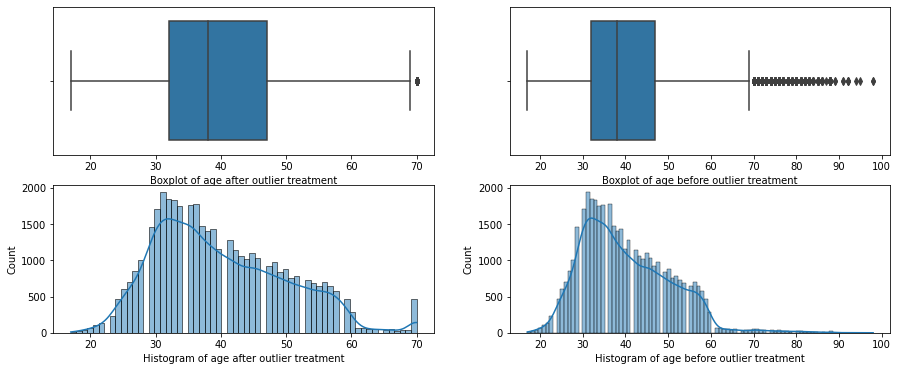

In [ ]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
sns.boxplot(x='age',data=term,ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of age after outlier treatment')
sns.boxplot(x='age',data=df,ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of age before outlier treatment')
sns.histplot(x='age',data=term,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of age after outlier treatment')
sns.histplot(x='age',data=df,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of age before outlier treatment')

In [ ]:
outliers.clear()
outlier_detection('campaign')

{'count': 41188.0, 'mean': 2.567592502670681, 'std': 2.7700135429023276, 'min': 1.0, '25%': 1.0, '50%': 2.0, '75%': 3.0, 'max': 56.0}
Inter quartile range is  2.0


(-2.0, 6.0)

In [ ]:
term.loc[((term['campaign']>= 6) & (term['campaign']<=56.0)), 'campaign' ]=round(upper_lim)

Text(0.5, 0, 'Histogram of campaign before outlier treatment')

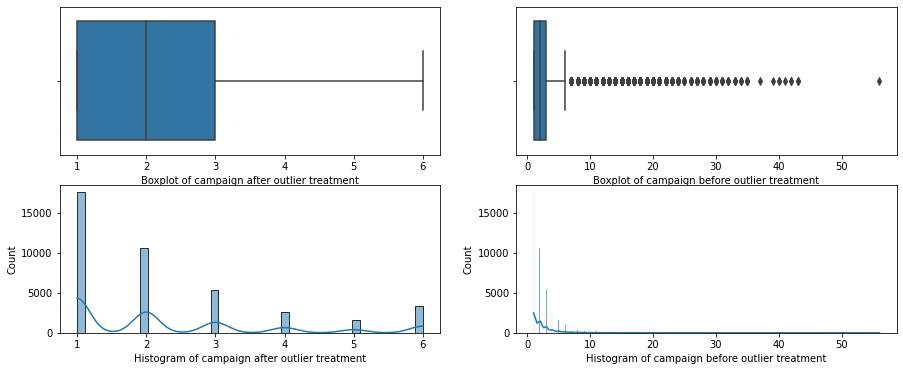

In [ ]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
sns.boxplot(x='campaign',data=term,ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of campaign after outlier treatment')
sns.boxplot(x='campaign',data=df,ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of campaign before outlier treatment')
sns.histplot(x='campaign',data=term,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of campaign after outlier treatment')
sns.histplot(x='campaign',data=df,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of campaign before outlier treatment')

#Separating Predictor and Target attribute

In [ ]:
#independent and dependent features
X = term.drop('target', axis = 1)
y = term['target']

In [ ]:
X.shape

(41188, 13)

In [ ]:
y.shape

(41188,)

#Separating Categorical and Numeric Variables

In [ ]:
X_num = X.drop(['job', 'marital', 'education', 'car.loan', 'hou.loan', 'per.loan','contact', 'month', 'day_of_week','outcome','pdays_cat'],axis = 1)
X_cat = X[['job', 'marital', 'education', 'car.loan', 'hou.loan', 'per.loan','contact', 'month', 'day_of_week','outcome','pdays_cat']]

In [ ]:
X_num.shape

(41188, 2)

In [ ]:
X_cat.shape

(41188, 11)

#Preprocessing on Numerical Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_num_scaled = scaler.fit_transform(X_num)

In [ ]:
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=X_num.columns)

#Preprocessing on Categorical Data

In [ ]:
#dummy encoding on X set
X_cat_dummy=pd.get_dummies(X_cat,drop_first=True)

In [ ]:
#Add categorical and numerical data
X_final = pd.concat([X_num_scaled_df, X_cat_dummy],axis=1,sort=False)

In [ ]:
X_final.shape

(41188, 41)

In [ ]:
y.shape

(41188,)

#Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final,y, test_size = 0.20,random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 41), (8238, 41), (32950,), (8238,))

In [ ]:
from collections import Counter
print(Counter(y_train))

Counter({0: 29245, 1: 3705})


Yes : 88.76 % No : 11.24 %

#Do Random Oversampling technique to balance the data , this method randomly selectes data from the minority class, with replacement, and adding them to the training dataset.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
RO = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_train_os,y_train_os = RO.fit_resample(X_train,y_train)

In [ ]:
X_train_os.shape,y_train_os.shape

((58490, 41), (58490,))

In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_os))

Counter({0: 29245, 1: 3705})
Counter({0: 29245, 1: 29245})


In [ ]:
X_train_os.shape, X_test.shape, y_train_os.shape, y_test.shape

((58490, 41), (8238, 41), (58490,), (8238,))

# Model



In [ ]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [ ]:
def classification_metrics(x,y) :
    accuracy = metrics.accuracy_score(x,y)
    F1_score= metrics.f1_score(x,y,average='macro')
    precision = metrics.precision_score(x,y)
    recall=metrics.recall_score(x,y)
    cm= metrics.confusion_matrix(x,y)
    
    print('accuracy score is :',accuracy )
    print('F1 score is :',F1_score )
    print('precision score is :',precision )
    print('recall score is :',recall )
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.title('Confusion Matrix',fontsize=16)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train_os,y_train_os)
y_predLR=LR.predict(X_test)

accuracy score is : 0.7902403495994174
F1 score is : 0.6288842854766747
precision score is : 0.28808123997862106
recall score is : 0.5764705882352941


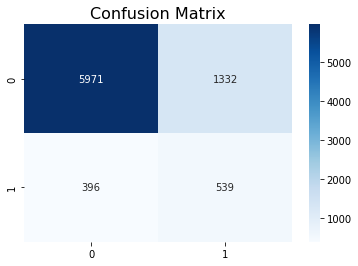

In [ ]:
classification_metrics(y_test,y_predLR)

# Decision Tree Classifier

In [ ]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [ ]:
dtree.fit(X_train_os,y_train_os)
y_predDT=dtree.predict(X_test)

accuracy score is : 0.8356397183782471
F1 score is : 0.6110389899321561
precision score is : 0.29913710450623204
recall score is : 0.3336898395721925


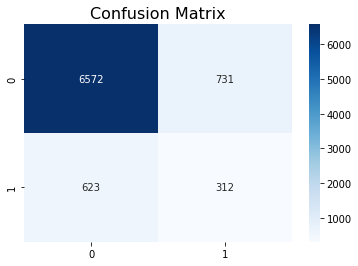

In [ ]:
classification_metrics(y_test,y_predDT)

In [ ]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train_os,y_train_os) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 7, 'min_samples_split': 50}


In [ ]:
y_predDT1=tree_grid.predict(X_test)

accuracy score is : 0.7937606215100753
F1 score is : 0.6264795554485112
precision score is : 0.2865921787709497
recall score is : 0.5486631016042781


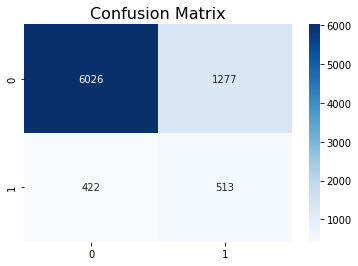

In [ ]:
classification_metrics(y_test,y_predDT1)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=50)
RF.fit(X_train_os,y_train_os)
y_predRF=RF.predict(X_test)

accuracy score is : 0.8225297402282107
F1 score is : 0.655069426839225
precision score is : 0.3314139475367882
recall score is : 0.5540106951871657


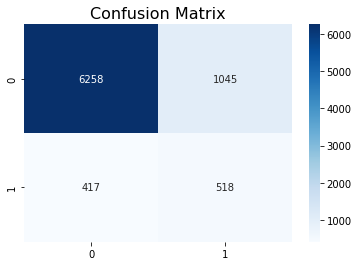

In [ ]:
classification_metrics(y_test,y_predRF)

#GBM

In [ ]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=7,min_samples_split=50)
gbm.fit(X_train_os,y_train_os)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: C

GradientBoostingClassifier(criterion='mse', max_depth=7, min_samples_split=50,
                           random_state=0)

In [ ]:
y_pred_gbm=gbm.predict(X_test)

accuracy score is : 0.8185239135712552
F1 score is : 0.6480931201800822
precision score is : 0.321656050955414
recall score is : 0.5401069518716578


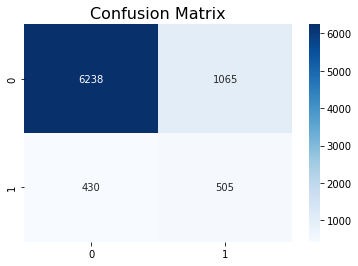

In [ ]:
classification_metrics(y_test,y_pred_gbm)